### Задача 1
Даны значения зарплат из выборки выпускников: 

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

In [2]:
sal_grad = pd.DataFrame({'salary':[100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]})

Посчитаем среднее арифметическое по формуле:

$$\overline{x} = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m x_i.$$

In [3]:
def arith_mean(df):
    return df['salary'].sum() / df['salary'].count()

In [4]:
sal_grad_mean = arith_mean(sal_grad)
sal_grad_mean

65.3

Проверим результат с помощью статистической функции:

In [5]:
sal_grad.mean()

salary    65.3
dtype: float64

Посчитаем среднее квадратическое отклонение по формуле:

$$\sigma = \sqrt{\dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2}.$$

In [6]:
def stand_dev(df, df_mean):
    return np.sqrt(((df['salary'] - df_mean) ** 2).sum() / df['salary'].count())

In [7]:
sal_grad_dev = stand_dev(sal_grad, sal_grad_mean)
sal_grad_dev

30.823854398825596

Проверим результат с помощью статистической функции:

In [8]:
sal_grad.std(ddof=0)

salary    30.823854
dtype: float64

Теперь посчитаем смещенную оценку дисперсии по формуле:

$$\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$

In [9]:
def off_var_est(df, df_mean):
    return ((df['salary'] - df_mean) ** 2).sum() / df['salary'].count()

In [10]:
sal_grad_ove = off_var_est(sal_grad, sal_grad_mean)
sal_grad_ove

950.11

Проверим результат с помощью статистической функции:

In [11]:
sal_grad.var(ddof=0)

salary    950.11
dtype: float64

Теперь посчитаем несмещенную оценку дисперсии по формуле:
    
$$\sigma_{\text{unbiased}}^2 = \dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$

In [12]:
def un_var_est(df, df_mean):
    return ((df['salary'] - df_mean) ** 2).sum() / (df['salary'].count() - 1)

In [13]:
sal_grad_uve = un_var_est(sal_grad, sal_grad_mean)
sal_grad_uve

1000.1157894736842

Проверим результат с помощью статистической функции:

In [14]:
sal_grad.var(ddof=1)

salary    1000.115789
dtype: float64

### Задача 2
Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

Сначала посчитаем первый и третий квартили:

In [15]:
sal_grad.quantile([0.25, 0.75])

,salary
0.25,42.0
0.75,81.0


Теперь посчитаем интерквартильное расстояние:

In [16]:
def interquartile_dist(df):
    return df.quantile(0.75) - df.quantile(0.25)

In [17]:
interquartile_dist(sal_grad)

salary    39.0
dtype: float64

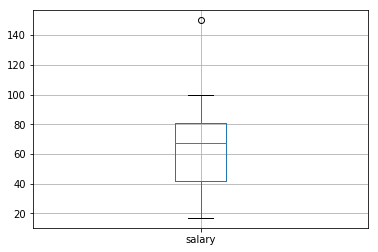

In [18]:
sal_grad[['salary']].boxplot()

По графику видно, что выбросов не очень много. Найдем "усы".

In [19]:
q1 = sal_grad['salary'].quantile(0.25)
q3 = sal_grad['salary'].quantile(0.75)

iqr = q3 - q1

boxplot_range = ((1.5 * iqr) - q1, q3 + 1.5 * iqr)
boxplot_range

(16.5, 139.5)

Теперь посчитаем кол-во выбросов:

In [20]:
outliers = sal_grad.loc[(sal_grad['salary'] < boxplot_range[0]) | (sal_grad['salary'] > boxplot_range[1])]
outliers.shape[0]

1

Собственно выброс оказался всего один (видно на графике, но мало ли спрятались друг за друга =))
Для интереса посчитаем его долю:

In [21]:
outliers.shape[0] / sal_grad.shape[0]

0.05

### Задача 3
Для распределения Пуассона с параметром a = 5 найти теоретические (т.е. используя закон распределения, а не выборку) мат. ожидание, моду и медиану.

Метематическое ожидание и дисперсия распределения для распределения Пуассона:
$$M(X) = D(X) = a.$$

Следуя условию задачи получаем $$M(X) = 5.$$

Медиана, согласно википедии, для распределения Пуассона рассчитывается по формуле:

$$Med \approx \lfloor \lambda +1/3-0.02/\lambda \rfloor.$$

In [22]:
a = 5
mediana = math.floor(a + (1 / 3) - (0.02 / a))
mediana

5

Мода для распределения Пуассона имеет формулу:

$$Moda =  \lfloor \lambda \rfloor.$$

In [23]:
moda = math.floor(a)
moda

5

Мы видим что для целого числа мода и медиана для распределения Пуассона сводится к значению __a__

### Задача 4
В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Вероятность того, что студент учится на каком либо факультете обозначим __P_B__, a вероятность сдать экзамен при условии, что студент учится на заданном факультете __P_A_B__.

Сначала посчитаем вероятность того, что студент сдающий экзамен учится на том или ином факультете. Т.к. по условию нам дано, что на факультетах __A__ и __B__ учится равное кол-во студентов, а на факультете __С__ столько же сколько на __А__ и __В__, то искомые вероятности будут иметь вид:

In [24]:
P_Ba = 0.25
P_Bb = 0.25
P_Bc = 0.5
P_A_Ba = 0.8
P_A_Bb = 0.7
P_A_Bc = 0.9

Далее по формуле полной вероятности 

$$P(A) = P(A | H_1) \cdot P(H_1) + P(A | H_2) \cdot P(H_2) + \dots + P(A | H_n) \cdot P(H_n)$$

посчитаем вероятность __P_A__ сдать экзамен любому студенту, любого факультета.

In [25]:
P_A = P_Ba * P_A_Ba + P_Bb * P_A_Bb + P_Bc * P_A_Bc
P_A

0.825

Теперь по формуле Бaйеса 

$$P(B|A) = \frac{P(A|B) \cdot P(B)}{P(A)}$$

посчитаем вероятность того, что студет сдавший экзамен учится на факультете A - __P_Ba_A__, на факультете B - __P_Bb_A__, на факультете С - __P_Bc_A__.

In [26]:
P_Ba_A = (P_Ba * P_A_Ba) / P_A
P_Ba_A

0.24242424242424246

In [27]:
P_Bb_A = (P_Bb * P_A_Bb) / P_A
P_Bb_A

0.21212121212121213

In [28]:
P_Bc_A = (P_Bc * P_A_Bc) / P_A
P_Bc_A

0.5454545454545455

Проверим образуют ли найденные вероятности полную группу событий:

In [29]:
P_Ba_A + P_Bb_A + P_Bc_A == 1

True

Таким образом вероятность того что студент сдал экзамен и он учится: 

a) на факультете __A = 0.24242424242424246__ 

б) на факультете __B = 0.21212121212121213__ 

в) на факультете __C = 0.5454545454545455__